# A recap of the quadratic-equation activity.

In the activity this week we saw a few new things. Notably those were:
- if statements, and
- a tolerance check.

An if-statement is an example of a flow-control structure. The following image is helpful for thinking about flow control. This image shows three flow charts.

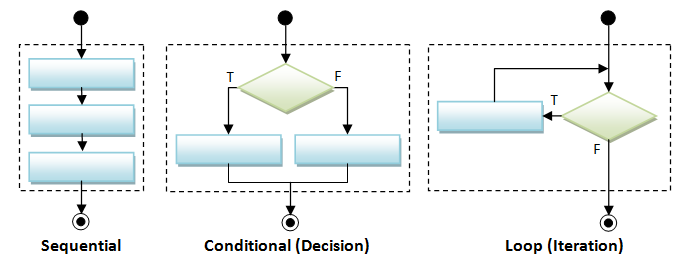

The flow chart on the left demonstrates how code in python is regularly run, and likely how your Homework 1 runs: one piece of code is run after another. 

The next example (in the middle) shows what happens when there is an if statement: there are two (or more) options for where the code can go, depending on the result of some check. 

The third example (on the right) shows another option: we can do a task, check something, and then repeat that task until some condition is met to make us stop. This is the idea behind a *for loop* which is what we will talk about today.

But before we talk about for loops, I want to talk about what we found in the activity. We ended up creating the following program, which finds the roots of the quadratic function $$f(x) = ax^2 + bx + c.$$ 

In [ ]:
import numpy as np

a = 1
b = np.sqrt(2)
c = 1/2

discriminant = b**2-4*a*c
tol = 1e-12
if np.abs(discriminant)<tol:
    print('There is one real root')
    root1 = -b/(2*a)
    roots = np.array([root1])
elif discriminant >= tol:
    print('There are two real roots')
    root1 = (-b - np.sqrt(discriminant))/(2*a)
    root2 = (-b + np.sqrt(discriminant))/(2*a)
    roots = np.array([root1, root2])
else:
    print('There are no real roots')
    roots = np.array([]) # This creates an empty array


print(roots)

We got to this by stress-testing another algorithm that checked if `discriminant == 0` and finding that that algorithm was not *robust* enough. That is because rounding errors can make `discriminant == 0` return False even when it should be true. 

A reasonable question now is: are we done? Is this code bulletproof now? Does it always give the right answer? Before continuing, I want you to think about this for a little bit.

To see what can happen, let's think about what the discriminant represents. To do this, consider the following 3 plots.

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-2.5,1,1000)

# Below is something new: a function. In particular, it is an 
# *anonymous function*. This will allow me to get the discriminant
# just by plugging in a, b, and c
calculate_discriminant = lambda a, b, c: b**2 - 4*a*c
plt.plot(x, x**2 + 2*x + 3, linewidth=2, color='#377eb8',
         linestyle='--',
        label='Discriminant = ' + str(calculate_discriminant(1, 2, 3))
        )
plt.plot(x, x**2 + np.sqrt(2)*x + 1/2, linewidth=2, color='#ff7f00',
         linestyle=':',
        label='Discriminant = ' + str(calculate_discriminant(1, np.sqrt(2), 1/2))
        )
plt.plot(x, x**2 + np.sqrt(2)*x - 1, linewidth=2, color='#4daf4a',
         linestyle='-.',
        label='Discriminant = ' + str(calculate_discriminant(1, np.sqrt(2), -1))
        )
plt.plot(x, 0*x, color='#f781bf', linewidth=3) # Create a line at 0
plt.legend()
plt.xlabel('x')
plt.ylabel('Quadratic function of x')
plt.title('Three quadratic functions with different discriminants')
plt.show()

Note that as the discriminant increases from a negative number, it goes from 0 roots to 1 root and then to 2 roots. You can think about this like the two roots in the green curve coalesce when the discriminant is zero.

So what happens wen the discriminant is small and negative? An easy way to make sure this is true is by making two roots close together. For example, consider the polynomial 
$$ f(x) = (x-r_1)(x-r_2) = x^2 - (r_1 + r_2) x + r_1 r_2$$
where $r_1$ and $r_2$ are close. 

In [ ]:
%matplotlib notebook 
# We are going to need to zoom in on this plot,
                     # this allows for that.
root1 = -0.5
root2 = root1 + 1e-13
a_bad = 1
b_bad = -(root1 + root2)
c_bad = root1*root2

plt.plot(x, a_bad*x**2 + b_bad*x + c_bad, linewidth=2, color='#377eb8',
         linestyle='--',
        label='Discriminant = ' + str(calculate_discriminant(a_bad, b_bad, c_bad))
        )
plt.plot(x, 0*x, color='#f781bf', linewidth=3) # Create a line at 0




Let's see what the algorithm gives us.

In [ ]:
a = a_bad
b = b_bad
c = c_bad

discriminant = b**2-4*a*c
tol = 1e-12
if np.abs(discriminant)<tol:
    print('There is one real root')
    root1 = -b/(2*a)
    roots = np.array([root1])
elif discriminant >= tol:
    print('There are two real roots')
    root1 = (-b - np.sqrt(discriminant))/(2*a)
    root2 = (-b + np.sqrt(discriminant))/(2*a)
    roots = np.array([root1, root2])
else:
    print('There are no real roots')
    roots = np.array([]) # This creates an empty array


print(roots)

This gives the **wrong answer**. We can see from this example that no matter how we define the tolerance, we can create an example that will not work for the algorithm. That's usually how it is: we can't possible cover all cases, we just have to do the best we can.

Okay, on to the new stuff...

# For Loops
In this lecture, we will discuss loops: A programming concept that allows you to repeate a block of code many times. To do so we are going to think about a specific mathematical example. 

## Fibonacci numbers
We will try to calculate some Fibonacci numbers.  The Fibonacci numbers $F_n$ are defined by the following recurrence relation: 

$$F_n = F_{n-1} + F_{n-2},$$

where $F_1 = F_2 = 1$.  That is, the $n$th Fibonacci number is the sum of the previous two. The first 6 Fibonacci numbers are

$$ 1, 1, 2, 3, 5, 8.$$

To the best of our knowledge, the Fibonacci numbers were first known to Indian mathematicians around 200BC. 1400 years later Leonardo of Pisa discovered work on this sequence in his travels to Asia and the Middle east and brought the knowledge to West to Europe. From Wikipedia 

"Fibonacci numbers appear unexpectedly often in mathematics, so much so that there is an entire journal dedicated to their study, the Fibonacci Quarterly. Applications of Fibonacci numbers include computer algorithms such as the Fibonacci search technique and the Fibonacci heap data structure, and graphs called Fibonacci cubes used for interconnecting parallel and distributed systems. They also appear in biological settings, such as branching in trees, the arrangement of leaves on a stem, the fruit sprouts of a pineapple, the flowering of an artichoke, an uncurling fern, and the arrangement of a pine cone's bracts."

Our goal will be to calculate the first 20 Fibonacci numbers and save them in an array. To do so, we can predefine an array, `Fibonacci` and then populate it. This is a common technique that we will see over and over in this class. 

In [ ]:
Fibonacci = np.zeros(20) # returns an array with 20 zeros, 
                         # we will fill in later.
print(Fibonacci)

We can start by initializing the first two numbers.

In [ ]:
Fibonacci[0] = 1
Fibonacci[1] = 1

And then calculate the next numbers.

In [ ]:
Fibonacci[2] = Fibonacci[0] + Fibonacci[1] 
Fibonacci[3] = Fibonacci[1] + Fibonacci[2]
#Let's check our work before continuing.
print(Fibonacci)

This looks right, but notice that this is going to be a lot of typing or copying and pasting. In particular, I keep doing the same thing over and over. **Continuing with copying and pasting is dangerous because it's likely we can make a typo.**

Notice that I keep doing the formula

```Fibonacci[k] = Fibonacci[k-1] + Fibonacci[k-2]```

With just `k` changing. So I could do this in a better way, with less changing each time:

In [ ]:
k = 4
Fibonacci[k] = Fibonacci[k-1] + Fibonacci[k-2]

k = 5
Fibonacci[k] = Fibonacci[k-1] + Fibonacci[k-2]

k = 6
Fibonacci[k] = Fibonacci[k-1] + Fibonacci[k-2]

# Check our work
print(Fibonacci)

Again this appears to be correct, which is good, but I am still copying and pasting or typing the same thing over and over. There's a better way to do this, and that's using a `for` loop. For loops allow us to repeat the same task over and over with only one thing changing: an index (above that is `k`). So what is the task we are doing over and over here? It is the formula

```Fibonacci[k] = Fibonacci[k-1] + Fibonacci[k-2]```

Here's the syntax. We'll first reset Fibonacci and start from scratch.

In [ ]:
Fibonacci = np.zeros(20)
Fibonacci[0] = 1
Fibonacci[1] = 1
for k in range(2, 20):
    Fibonacci[k] = Fibonacci[k-1] + Fibonacci[k-2]
    
# Check our work
print(Fibonacci)

Let's break this down a little bit. What does `range(2, 20)` do? It creates an *iterator* which is just a sequence of numbers beginning at 2 and ending at 19 (not including the endpoint, as we have seen before with arange). Unlike `arange`, `range` doesn't actually create those numbers. It creates an object you can *iterate* or loop over.

In [ ]:
range(2,20)

Note that this the for loop really simplifies our work. Without the for loop we have at least 21 lines of code. With a for loop, we have 5 lines of code.

Another thing to note is that the code above is not the only way we could have written the loop. If we have 

```Fibonacci[k] = Fibonacci[k-1] + Fibonacci[k-2]```

then defining `j = k-1` we could also write this as

```Fibonacci[j+1] = Fibonacci[j] + Fibonacci[j-1]```

or if `l = k-2` then

```Fibonacci[j+2] = Fibonacci[j+1] + Fibonacci[j]```

If we use the last formula, we would have the following code:

In [ ]:
Fibonacci = np.zeros(20)
Fibonacci[0] = 1
Fibonacci[1] = 1
for j in range(0, 18):
    Fibonacci[j+2] = Fibonacci[j+1] + Fibonacci[j]
    
# Check our work
print(Fibonacci)

Notice that this is the same as above. Also, the `range` function doesn't need the 0, we could instead use the following code.

In [ ]:
Fibonacci = np.zeros(20)
Fibonacci[0] = 1
Fibonacci[1] = 1
for j in range(18):
    Fibonacci[j+2] = Fibonacci[j+1] + Fibonacci[j]
    
# Check our work
print(Fibonacci)

Note that we can also use `if` statements in for loops.

In [ ]:
Fibonacci = np.zeros(20)
for k in range(20):
    if k < 2: # (j=0 or j = 1)
        Fibonacci[k] = 1
    else:
        Fibonacci[k] = Fibonacci[k-1] + Fibonacci[k-2]
    
# Check our work
print(Fibonacci)

Take some time to make sure you understand what is happening in the code above.

## Other for loop examples

It is common to use the `range` function when there is some index we are *iterating* over. But in python (not all languages have this nice property), we can iterate over other things, like arrays. For example, consider if we wanted to print out all of the Fibonacci numbers on their own line.

In [ ]:
print("The first Fibonacci number is", Fibonacci[0])
for fib_num in Fibonacci[1:]:
    print("The next Fibonacci number is", fib_num)

#### Calculating a sum using a for loop.

Consider the task of summing the first 20 Fibonacci numbers. This is...

In [ ]:
sum_total = Fibonacci[0]
sum_total = sum_total + Fibonacci[1]
sum_total = sum_total + Fibonacci[2]
print(sum_total)

etc. It can be helpful to write out what you want **not** in a for loop first because then you can see how it would look in the for loop. The part of the code that you keep rewriting is what goes in the for loop. Therefore we can sum the Fibonacci numbers with:

In [ ]:
sum_total = 0
for fib_num in Fibonacci:
    sum_total = sum_total + fib_num
    
print(sum_total)

Adding to a total is so common that python has a faster way to do this. We can replace the line 

``` sum_total = sum_total + fib_num```

with

```sum_total += fib_num```

which means "add `fib_num` to `sum_total` and save the result to `fib_num`.

In [ ]:
sum_total = 0
for fib_num in Fibonacci:
    sum_total += fib_num
    
print(sum_total)

#### Breaking out of for loops based an a specific condition.

Suppose we wish to calculate the sum of only the first 10 Fibonacci numbers. We could compute only the first ten and then sum those, but let's say we don't want to calculate those again. Instead we can use a `break` statement to stop the for loop once we have done a total of 10 iterations.

`break` statements are often important for once we have reached a desired goal. They stop the `for` loop.

In [ ]:
sum_total = 0
number_of_Fibs_added = 0 # This will keep track of the number of
                         # Fibonacci numbers that we have added up.
for fib_num in Fibonacci:
    sum_total += fib_num
    number_of_Fibs_added += 1 # Increase the count.
    if number_of_Fibs_added == 10: # Meaning we have added up 10
        print("We have computed the sum of the first 10 Fib Numbers")
        break
    
print(sum_total)

#### Generalized Fibonacci numbers

When one says "The Fibonacci numbers" they usually mean the ones we have calculated above, beginning with 1 and 1 as the *seeds*, but those are not the only Fibonacci numbers. We could start with different seeds and get different results. For instance, what if we started with 1 and 2?

In [ ]:
Fibonacci = np.zeros(20)
for k in range(20):
    if k==0: 
        Fibonacci[k] = 1
    elif k==1:
        Fibonacci[k] = 2
    else:
        Fibonacci[k] = Fibonacci[k-1] + Fibonacci[k-2]
    
# Check our work
print(Fibonacci)

Notice that we get a different sequence. 

What we are going to do here is calculate *5 different Fibonacci sequences* for 5 different sets of seeds. We can think about these seeds as two arrays:

$$ s_1 = [0, 1, 2, 3, 4], ~ s_2 = [1, 1, 2, 4, 5] $$

So the first set of seeds are $0$ and $1$, the second set of seeds are $1$ and $1$ (the original Fibonacci numbers we calculated, the third set of seeds are $2$ and $2$, etc. 

How are we going to store our answer? Well, we can think about the first array as the first *row* in some table, then the second array as the second *row* in the table, leading to something like this:

| Sequence 1  | Sequence 2 | Sequence 3 | Sequence 4 | Sequence 5 |
|-------|----------|---------|-------| ---------- |
| 0  | 1      | 2      | 3   |     4     |
| 1  | 1      | 2      | 4   |     5     |

etc. What would the next row be? It would become

| Sequence 1  | Sequence 2 | Sequence 3 | Sequence 4 | Sequence 5 |
|-------|----------|---------|-------| ---------- |
| 0  | 1      | 2      | 3   |     4     |
| 1  | 1      | 2      | 4   |     5     |
| 1  | 2 | 4 | 7 | 9 |

What we are building is called a *matrix* whose *columns* are Fibonacci sequences with different seeds. We can do this by using an array in the `for` loop. 



We are going to walk through this line by line because there is some new stuff here.

First we create a matrix of all zeros. It will have 20 rows and 5 columns because we want the first 20 Fibonacci numbers for 5 different seeds.

In [ ]:
Fibonacci = np.zeros((20, 5))
print(Fibonacci)

Now if we wanted to change just the 0th row, we could use

In [ ]:
Fibonacci[0, :] = [0, 1, 2, 3, 4]
print(Fibonacci)

Notice that we are using *indexing* and *slicing*. You should read this as "the 0th row of the `Fibonacci` array, and all columns in the 0th row, become the following 1-dimensional array.

Now we need to change the first row too

In [ ]:
Fibonacci[1, :] = [1, 1, 2, 4, 5]
print(Fibonacci)

Then to calculate the next row, we can use the formula

In [ ]:
Fibonacci[2, :] = Fibonacci[1, :] + Fibonacci[0, :]
print(Fibonacci)

Hopefully you can now see how we will do this in a loop with indexing and slicing.

In [ ]:
for k in range(3, 20):
    Fibonacci[k, :] = Fibonacci[k-1, :] + Fibonacci[k-2, :]
    
# Check our work
print(Fibonacci)